In [24]:
import pandas as pd

# Load your Excel file
file_path = r"C:\Users\pe16742\OneDrive - University of Bristol\Publications\Telesafe\safety netting\nhs england gp cons type 2024.xlsx"
df = pd.read_excel(file_path, sheet_name='output')

# Identify the total number of consultations (from the 'Total' row and 'Total' column)
grand_total = df.loc[12, 'Total']  # Row 12 is your "Total" row

# Calculate percentages for each consultation type column
cols_to_calc = ['Face-to-Face', 'Telephone', 'Video/Online', 'Home Visit', 'Unknown']

# Create a new row for 'Total %' by dividing each total by the grand total
df.loc[13, cols_to_calc] = df.loc[12, cols_to_calc] / grand_total * 100

# Optional: Set the 'Month' column for the new row so it looks nice
df.loc[13, 'Month (all 2024)'] = 'Total %'

df


,Month (all 2024),Face-to-Face,Telephone,Video/Online,Home Visit,Unknown,Total
0,January,8976590,5078555,596332,160296,134211,14945984
1,February,8391817,4692550,592438,141184,129243,13947232
2,March,8171769,4571046,641600,137723,109776,13631914
3,April,8193369,4581217,706303,147213,89553,13717655
4,May,8215868,4566447,735388,151504,93866,13763073
5,June,7644107,4289120,707322,137170,98263,12875982
6,July,8248510,4642174,804658,149748,102807,13947897
7,August,7207951,4104246,742186,136023,83922,12274328
8,September,7907083,4374236,817807,140962,94444,13334532
9,October,9711117,4761500,929336,165010,103240,15670203


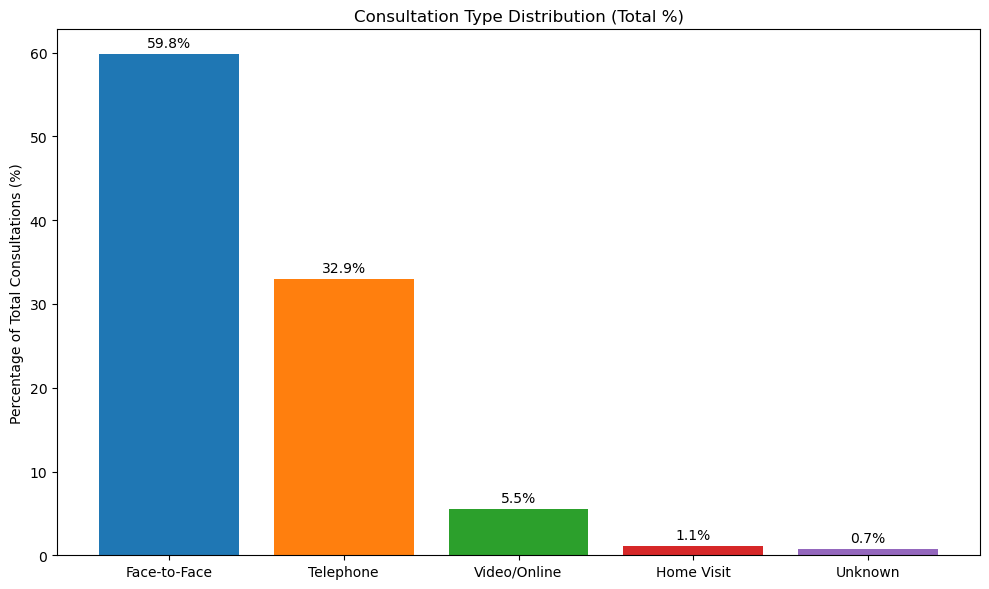

In [26]:
import matplotlib.pyplot as plt
# Define colours for the bars
bar_colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # blue, orange, green, red, purple

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cols_to_calc, df.loc[13, cols_to_calc], color=bar_colours)

# Add % labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.ylabel('Percentage of Total Consultations (%)')
plt.title('Consultation Type Distribution (Total %)')
plt.tight_layout()
plt.show()